In [49]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
import matplotlib.pyplot as plt

In [50]:
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position



In [51]:
AMZN = pd.read_csv("/Users/fahad/project_repo/data/final/Moving_Average_Preparation/AMZN_MA_prep.csv", index_col=0)

In [52]:
AMZN.columns = ['Date', 'Open','High','Low','Close','Volume']

In [53]:
AMZN.Date = pd.to_datetime(AMZN.Date, format="%Y-%m-%d")

In [54]:
AMZN = AMZN.set_index(AMZN['Date'])

In [55]:
AMZN = AMZN.drop("Date", axis=1)


In [56]:
AMZN.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-10,1996.51,2024.94,1995.40,2021.9985,3819085
2019-07-09,1947.80,1990.01,1943.47,1988.3000,4320668
2019-07-08,1934.12,1956.00,1928.25,1952.3200,2883371
2019-07-05,1928.60,1945.90,1925.30,1942.9100,2628359
2019-07-03,1935.89,1941.59,1930.50,1939.0000,1690294


In [57]:
plt.style.use('ggplot')

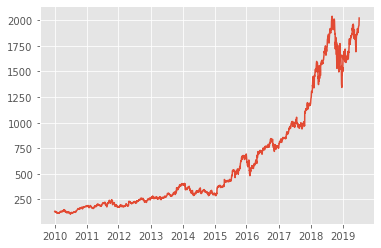

In [58]:

plt.plot(AMZN.index,AMZN.Close)

In [59]:
#dictionary to store equity
equity_dict = dict()

In [60]:
class SmaCrossTrailing(TrailingStrategy):
            
    n1 = 50
    n2 = 200
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.set_trailing_sl(4)
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if crossover(self.sma1, self.sma2) and (position.is_long !=True):
            
            #print (position.is_long)
                        
            
            self.buy()
        else:
            pass
#         elif crossover(self.sma2, self.sma1):
            
#             self.sell()
                        
        

            
#     def next(self):
#         #super().next()
#                 # If sma1 crosses above sma2, buy the asset
#         if crossover(self.sma1, self.sma2):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.buy()

#         # Else, if sma1 crosses below sma2, sell it
#         elif crossover(self.sma2, self.sma1):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.sell()
            

        
        

In [61]:
bt = Backtest(AMZN, SmaCrossTrailing, cash=10000, commission=.01)

bt.run()

/Users/fahad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Data index is not sorted in ascending order. Sorting.
  """Entry point for launching an IPython kernel.


Start                     2010-01-04 00:00:00
End                       2019-07-10 00:00:00
Duration                   3474 days 00:00:00
Exposure [%]                          72.9706
Equity Final [$]                      88071.9
Equity Peak [$]                       89278.9
Return [%]                            780.719
Buy & Hold Return [%]                 1410.08
Max. Drawdown [%]                    -34.1038
Avg. Drawdown [%]                     -3.6346
Max. Drawdown Duration      458 days 00:00:00
Avg. Drawdown Duration       24 days 00:00:00
# Trades                                    3
Win Rate [%]                              100
Best Trade [%]                        209.735
Worst Trade [%]                       63.5867
Avg. Trade [%]                        114.379
Max. Trade Duration        1099 days 00:00:00
Avg. Trade Duration         845 days 00:00:00
Expectancy [%]                            NaN
SQN                                   1.53944
Sharpe Ratio                      

In [62]:
bt.plot()

In [63]:
df = pd.DataFrame.from_dict([equity_dict])

In [64]:
df = df.T

In [65]:
df.columns = ['Equity']

In [66]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/AMZN_Moving_Average_Equity.csv")

In [67]:
df

,Equity
2010-10-19,10000.000000
2010-10-20,10000.000000
2010-10-21,10000.000000
2010-10-22,10000.000000
2010-10-25,10000.000000
2010-10-26,10000.000000
2010-10-27,10000.000000
2010-10-28,10000.000000
2010-10-29,10000.000000
2010-11-01,10000.000000


In [45]:
class SmaCross(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
#         print (self.sma1)
#         print (self.sma2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.sell()